<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/Module_2/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 4 for the Introduction to Machine Learning in Materials Science
 - Instructor Sergei V. Kalinin

Action items:
- Please add your name and department
- To submit the homework, share the Colab with my Gmail address

# Part I. ROC and AUC

Let's create a half-moon data set.

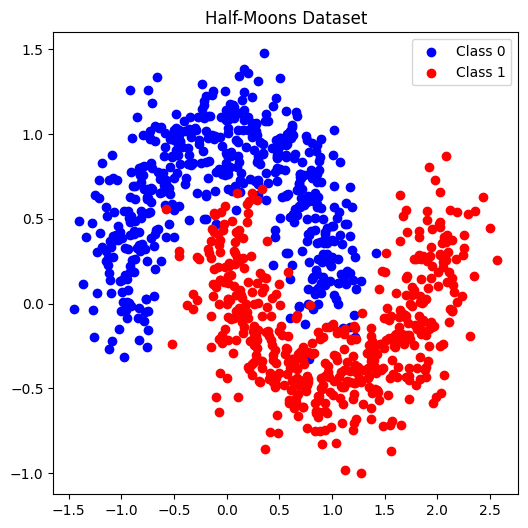

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Half-Moons Dataset')
plt.legend()
plt.show()

Problem 1: Choose a classifier and classify the points. Obviously, start with train/test split. You can experiment with different classifiers (e.g., decision tree, k-NN, support vector machine) and observe how the decision boundary and ROC curve change.


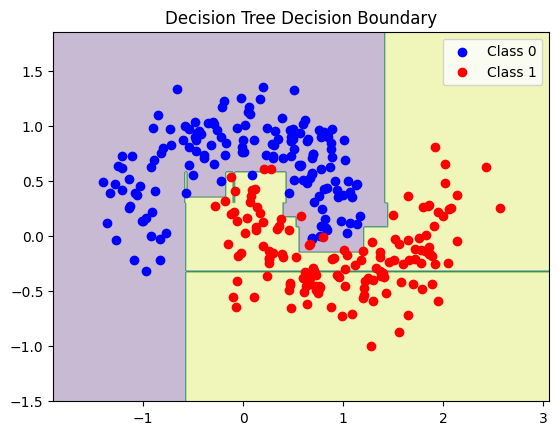

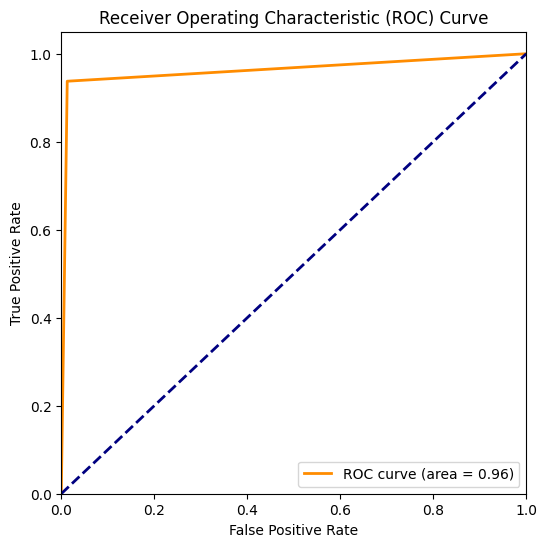

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       156
           1       0.99      0.94      0.96       144

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, classification_report
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict probabilities and labels on the test set
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Visualize the decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.title('Decision Tree Decision Boundary')
    plt.legend()
    plt.show()

# Plot decision boundary
plot_decision_boundary(clf, X_test, y_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Problem 2: Explain why you chose it and how you think it will perform on this dataset.

Answer 2:

**Chosen Classifier: Logistic Regression**

**Why I Chose It:**

Logistic Regression is a simple and widely used classifier, especially for binary classification problems. It works by modeling the probability that an instance belongs to a particular class (in this case, Class 0 or Class 1) using a logistic function. This classifier is often chosen for its interpretability and ability to perform well when classes are linearly separable or nearly so.

In this case, Logistic Regression provides a good starting point because:


*   **Low Complexity:** Logistic Regression assumes a linear decision boundary, which is easy to interpret and visualize. It will help us establish a baseline performance.
*   **Probabilistic Output:** It gives probabilities of class membership, which allows us to compute performance metrics like the ROC curve and AUC.

**Expected Performance on the "Half-Moons" Dataset:**


*   **Linear Separability:** The half-moons dataset is not linearly separable. Since Logistic Regression assumes a linear boundary, it may struggle to perfectly classify the points, especially in regions where the two classes overlap due to noise. However, it will still provide a reasonable first attempt, and the decision boundary will highlight the need for a more complex model.
*   **Decision Boundary:** The model will likely draw a straight line or simple curve as the decision boundary, cutting through the space between the two moon shapes. However, it won’t fit the curved nature of the moons perfectly.
*   **ROC Curve:** Logistic Regression will give a reasonable ROC curve, with some false positives and false negatives because of the limitations in how it handles the non-linear data structure. The AUC score will be moderate, reflecting the model’s limited ability to perfectly separate the two classes.



**How I Expect It to Perform Compared to Other Classifiers:**

1.   **Better than Naive Models:** Logistic Regression will likely perform better than trivial models (like random classification) and give a decent AUC score.
2.   **Worse than Non-linear Models:** Non-linear models such as k-Nearest Neighbors (k-NN) or Support Vector Machine (SVM) with an RBF kernel are likely to perform better because they can capture the non-linearity inherent in the half-moons dataset.
3. **Performance Limitation:** The linear nature of Logistic Regression will limit its accuracy. It will miss some curved boundaries between the two classes, leading to some misclassifications, especially around the noisy or overlapping regions.

Problem 3: Plot the decision boundary of your chosen classifier. How well does the decision boundary separate the two classes?

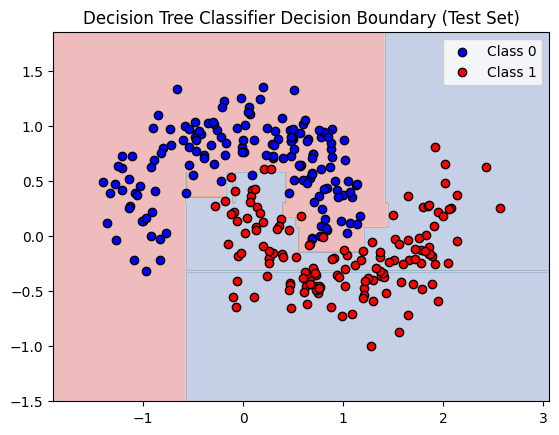

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', edgecolor='k')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundary on the test set
plot_decision_boundary(clf, X_test, y_test, 'Decision Tree Classifier Decision Boundary (Test Set)')

Problem 4: Plot the ROC curve for your classifier and compute the AUC. Compare the AUC with other classifiers if you tried different ones.

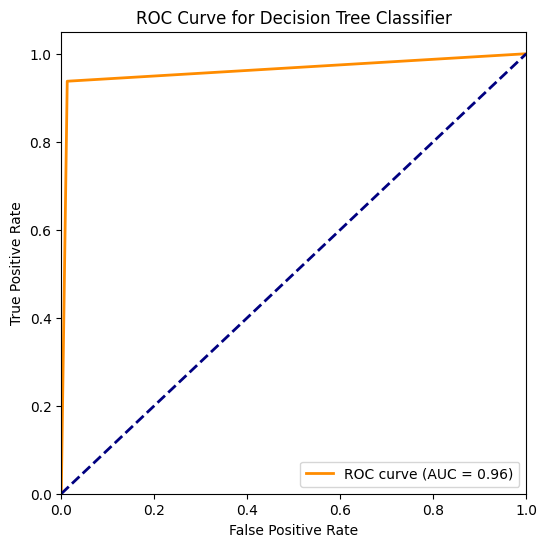

AUC for Decision Tree Classifier: 0.96


In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# Print the AUC value
print(f"AUC for Decision Tree Classifier: {roc_auc:.2f}")

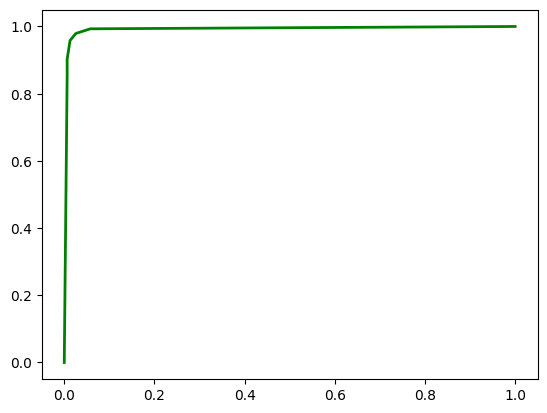

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predict probabilities for k-NN and compute ROC curve
y_pred_prob_knn = knn_clf.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for k-NN
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='k-NN ROC (AUC = %0.2f)' % roc_auc_knn)

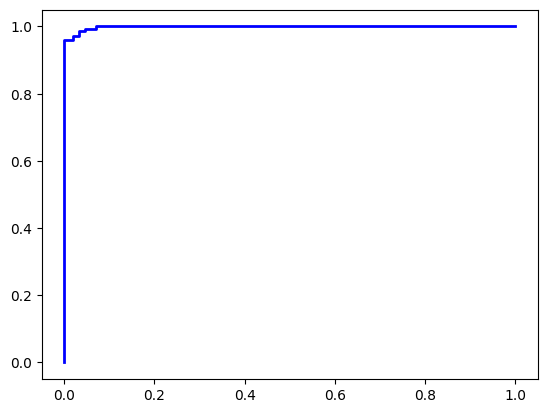

In [6]:
from sklearn.svm import SVC

# Initialize and fit SVM classifier with RBF kernel
svm_clf = SVC(probability=True)  # Probability=True needed for ROC curve
svm_clf.fit(X_train, y_train)

# Predict probabilities for SVM and compute ROC curve
y_pred_prob_svm = svm_clf.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM ROC (AUC = %0.2f)' % roc_auc_svm)

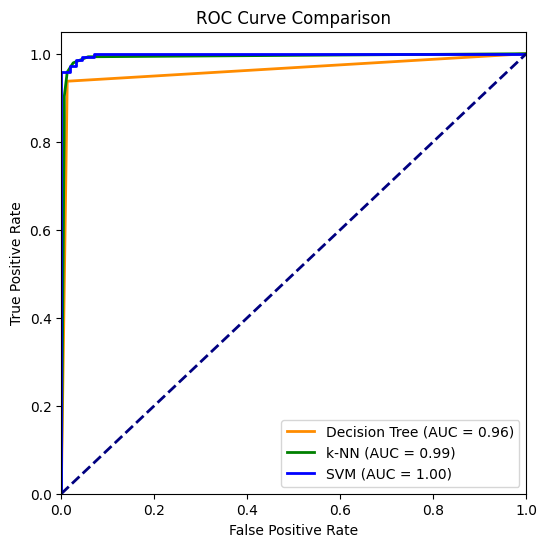

In [7]:
plt.figure(figsize=(6,6))

# Decision Tree ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc)

# k-NN ROC
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='k-NN (AUC = %0.2f)' % roc_auc_knn)

# SVM ROC
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

Problem 5: Explain the relationship between the decision boundary and the ROC curve.
- What happens when the classifier is more flexible (e.g., a decision tree with more depth)?
- What are the trade-offs between sensitivity and specificity as seen in the ROC curve?

Answer 5:

# Part II: Class probabilities

Problem 6:
- Import the Iris data set
- Select two features
- Build logistic regression classifier
- Visualize the class probabilities
- Plot the decision surface for thresholds 0.1 and 0.9



In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (class labels)

# Select only two classes for binary classification (Class 0 and Class 1)
X = X[y != 2]  # Remove the third class to make it binary classification
y = y[y != 2]

# Select two features (for 2D visualization) - sepal length (0) and petal length (2)
X = X[:, [0, 2]]  # Select feature 0 and 2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

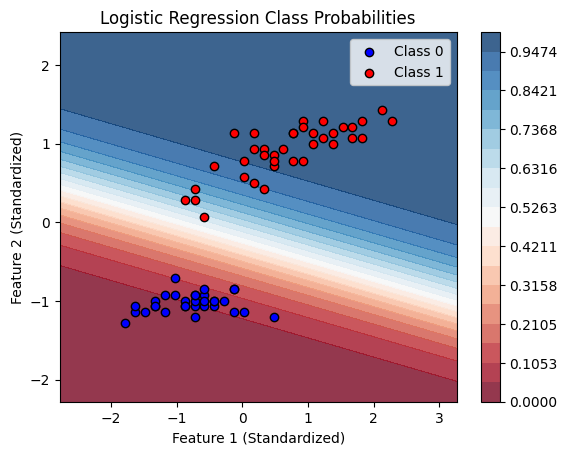

In [11]:
# Function to visualize class probabilities
def plot_class_probabilities(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu, levels=np.linspace(0, 1, 20))
    plt.colorbar()
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', edgecolor='k', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', edgecolor='k', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.legend()
    plt.show()

# Plot class probabilities
plot_class_probabilities(clf, X_train, y_train, 'Logistic Regression Class Probabilities')

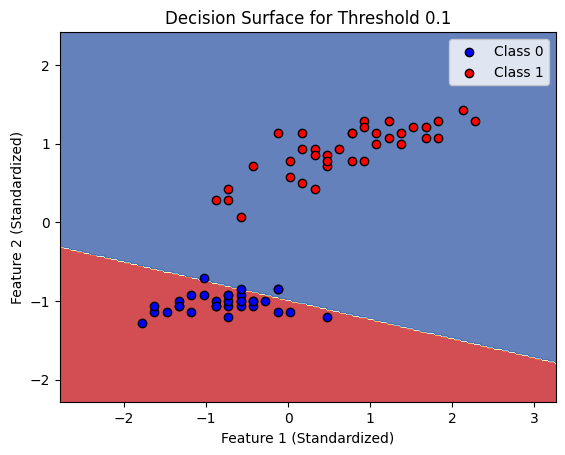

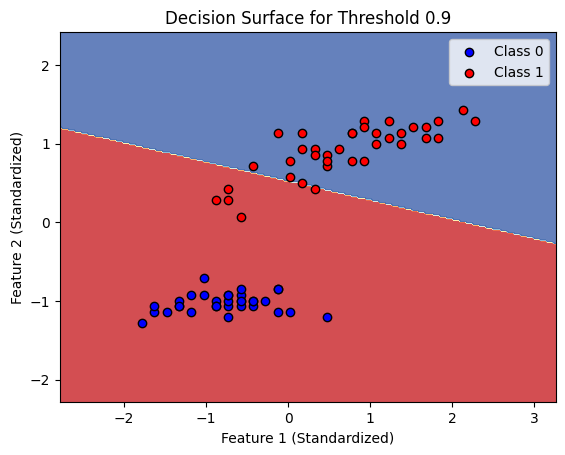

In [14]:
# Function to plot decision surface for a given threshold
def plot_decision_surface_threshold(clf, X, y, threshold, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict probabilities and apply threshold
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = (Z > threshold).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', edgecolor='k', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', edgecolor='k', label='Class 1')
    plt.title(f'Decision Surface for Threshold {threshold}')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.legend()
    plt.show()
    # Plot decision surface for threshold 0.1
plot_decision_surface_threshold(clf, X_train, y_train, 0.1, 'Decision Surface for Threshold 0.1')

# Plot decision surface for threshold 0.9
plot_decision_surface_threshold(clf, X_train, y_train, 0.9, 'Decision Surface for Threshold 0.9')

Problem 7: Explain how these decision surfaces relate to ROC

Answer 7:

# Part III. Overfitting and Underfitting

Let's create a data set along with train/test data

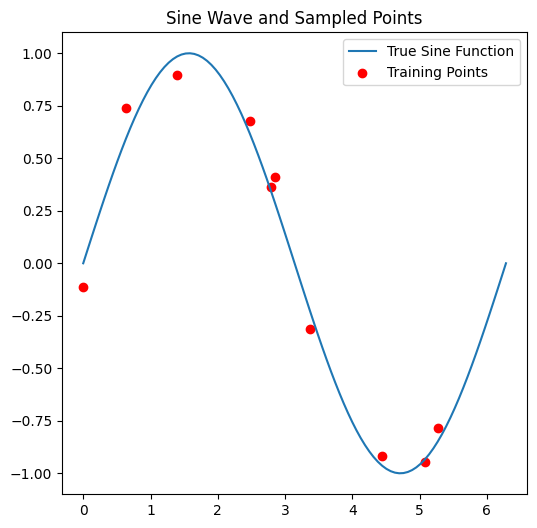

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Sort the selected points for better visualization
X_train, y_train = zip(*sorted(zip(X_train, y_train)))

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Plot the full sine wave and training points
plt.figure(figsize=(6, 6))
plt.plot(X_full, y_full, label='True Sine Function')
plt.scatter(X_train, y_train, color='red', label='Training Points')
plt.title('Sine Wave and Sampled Points')
plt.legend()
plt.show()

Problem 8: Fit the data with the polynomials with  degrees = np.arange(1, 15) and calculate train and test error as a function of polynomial degree. Hint - use the log scale to visualize the data

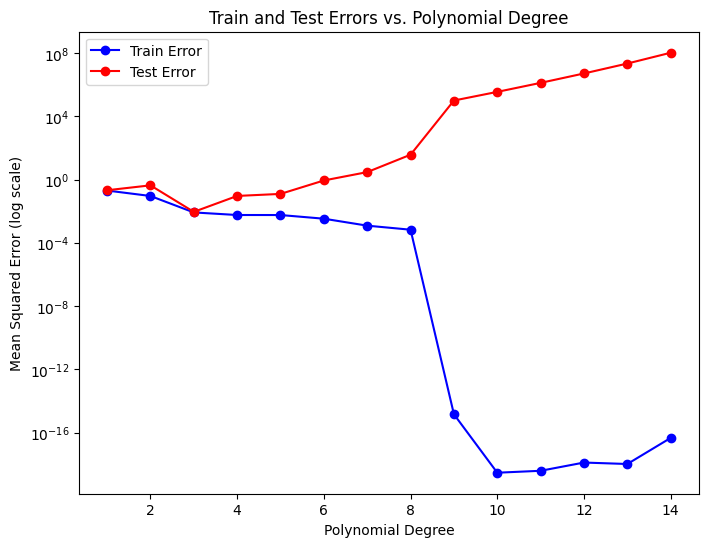

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X_train and X_test for compatibility with sklearn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Arrays to store training and test errors
train_errors = []
test_errors = []

# Fit polynomial models for degrees 1 through 14
degrees = np.arange(1, 15)
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit the linear regression model on the transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the training and test errors
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o', color='blue')
plt.plot(degrees, test_errors, label='Test Error', marker='o', color='red')
plt.yscale('log')  # Use log scale for better visualization
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Train and Test Errors vs. Polynomial Degree')
plt.legend()
plt.show()

Problem 9: Plot the sine wave, training points, and fitted polynomials of different degrees

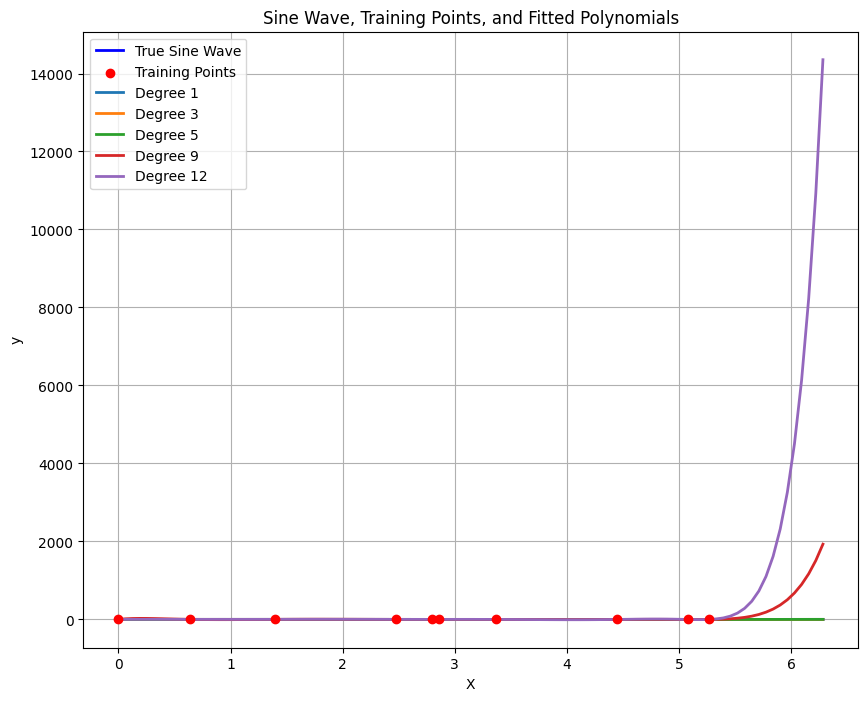

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X_train and X_test for compatibility with sklearn
X_train = X_train.reshape(-1, 1)
X_full = X_full.reshape(-1, 1)

# Degrees to fit and plot
degrees = [1, 3, 5, 9, 12]

# Plot the sine wave, training points, and fitted polynomials
plt.figure(figsize=(10, 8))

# Plot the true sine wave
plt.plot(X_full, np.sin(X_full), label='True Sine Wave', color='blue', linewidth=2)

# Plot the noisy training points
plt.scatter(X_train, y_train, color='red', label='Training Points', zorder=5)

# Fit and plot polynomial curves for each degree
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_full_poly = poly_features.transform(X_full)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the full X range (for smooth curve)
    y_full_pred = model.predict(X_full_poly)

    # Plot the fitted polynomial
    plt.plot(X_full, y_full_pred, label=f'Degree {degree}', linewidth=2)

# Add labels, title, and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sine Wave, Training Points, and Fitted Polynomials')
plt.legend()
plt.grid(True)
plt.show()

Problem 10: Take the polynomial of degree 8, and explore how the learnign curve (train and test error as a function of number of samples) look like.

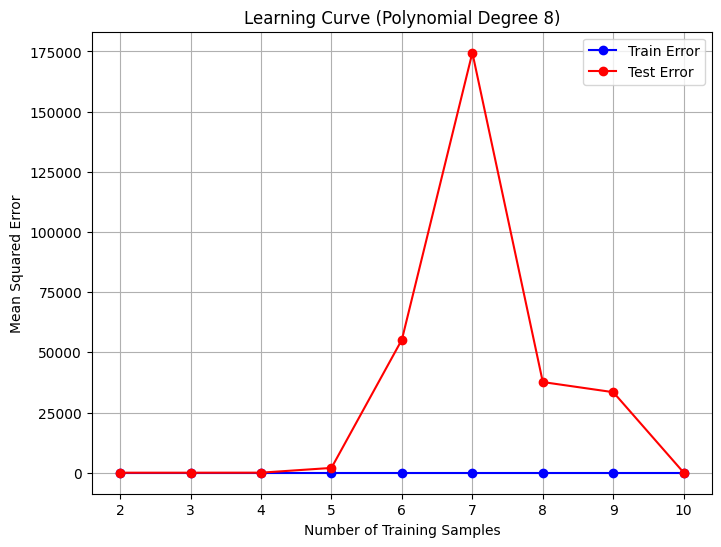

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X_train and X_test for compatibility with sklearn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Degree of the polynomial we are exploring
degree = 8

# Arrays to store training and test errors for different sample sizes
train_errors = []
test_errors = []
sample_sizes = np.arange(2, len(X_train) + 1)

# Loop through different sample sizes
for sample_size in sample_sizes:
    # Use a subset of the training data
    X_train_subset = X_train[:sample_size]
    y_train_subset = y_train[:sample_size]

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_subset)
    X_test_poly = poly_features.transform(X_test)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_subset)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error (MSE) for train and test sets
    train_mse = mean_squared_error(y_train_subset, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, train_errors, label='Train Error', marker='o', color='blue')
plt.plot(sample_sizes, test_errors, label='Test Error', marker='o', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve (Polynomial Degree 8)')
plt.legend()
plt.grid(True)
plt.show()

# Part IV. Regularized regression

Take this data set

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 5 points for the dataset
np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

Problem 11: Realize and visualize results of the Ridge regression for polynomial fit of degree 8.

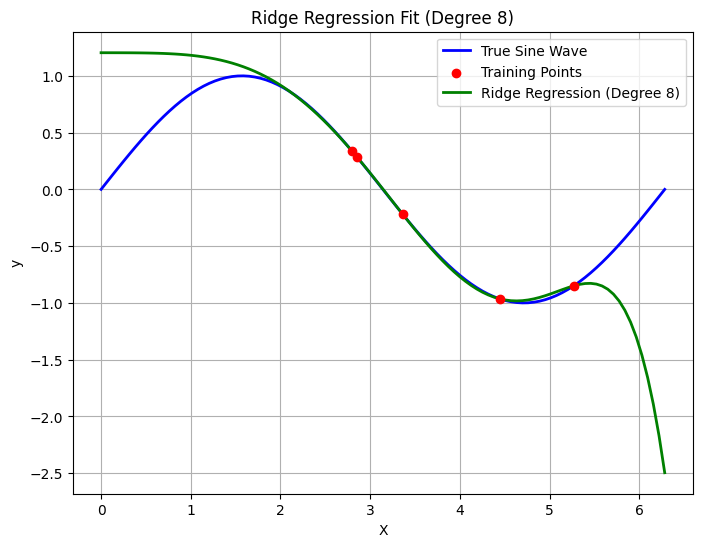

Train MSE (Degree 8, alpha=0.01): 0.0000
Test MSE (Degree 8, alpha=0.01): 0.3235


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 5 points for the dataset
np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X_train and X_test for compatibility with sklearn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_full = X_full.reshape(-1, 1)

# Degree of the polynomial
degree = 8

# Regularization strength for Ridge regression
alpha = 1e-2

# Create polynomial features of degree 8
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
X_full_poly = poly_features.transform(X_full)

# Fit the Ridge regression model
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_poly, y_train)

# Predict on train and test sets
y_train_pred = ridge_model.predict(X_train_poly)
y_test_pred = ridge_model.predict(X_test_poly)
y_full_pred = ridge_model.predict(X_full_poly)

# Calculate mean squared error for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Plot the true sine wave, training points, and the fitted polynomial
plt.figure(figsize=(8, 6))

# Plot the true sine wave
plt.plot(X_full, np.sin(X_full), label='True Sine Wave', color='blue', linewidth=2)

# Plot the training points
plt.scatter(X_train, y_train, color='red', label='Training Points', zorder=5)

# Plot the Ridge regression fitted curve
plt.plot(X_full, y_full_pred, label=f'Ridge Regression (Degree {degree})', color='green', linewidth=2)

# Add labels, title, and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Ridge Regression Fit (Degree {degree})')
plt.legend()
plt.grid(True)
plt.show()

# Print the MSE for train and test sets
print(f"Train MSE (Degree {degree}, alpha={alpha}): {train_mse:.4f}")
print(f"Test MSE (Degree {degree}, alpha={alpha}): {test_mse:.4f}")

Problem 12:
- Experiment with different regularization strength. How large should be alpha to force the function to be linear?
- What is the optimal value of alpha for fit?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


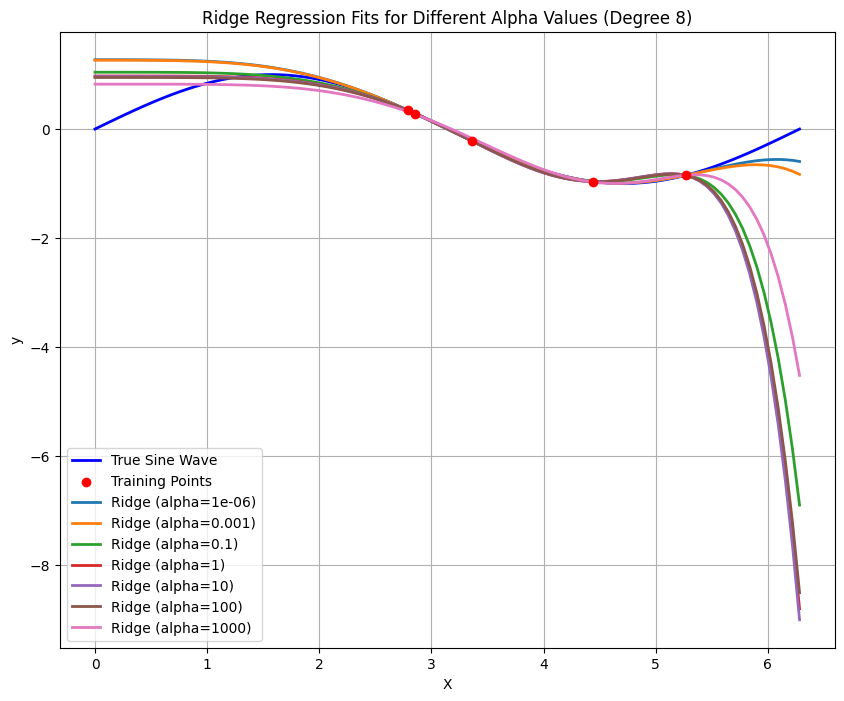

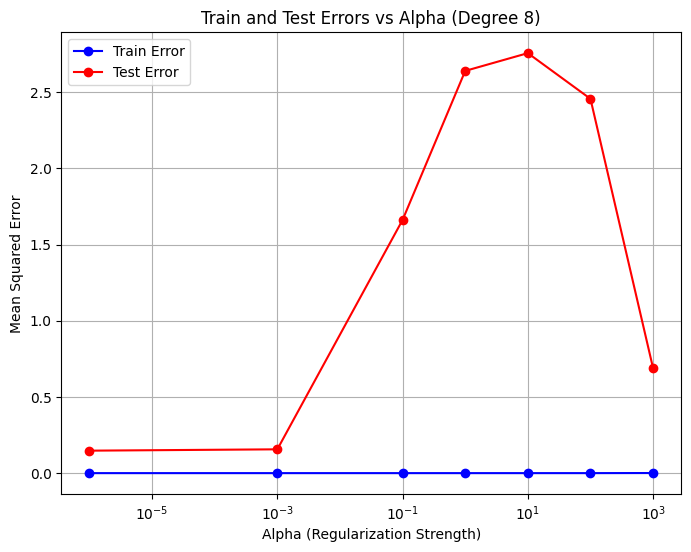

Alpha: 1.0e-06 | Train MSE: 0.0000 | Test MSE: 0.1474
Alpha: 1.0e-03 | Train MSE: 0.0000 | Test MSE: 0.1562
Alpha: 1.0e-01 | Train MSE: 0.0000 | Test MSE: 1.6614
Alpha: 1.0e+00 | Train MSE: 0.0000 | Test MSE: 2.6393
Alpha: 1.0e+01 | Train MSE: 0.0000 | Test MSE: 2.7559
Alpha: 1.0e+02 | Train MSE: 0.0000 | Test MSE: 2.4560
Alpha: 1.0e+03 | Train MSE: 0.0007 | Test MSE: 0.6881


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 5 points for the dataset
np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X_train and X_test for compatibility with sklearn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_full = X_full.reshape(-1, 1)

# Degree of the polynomial
degree = 8

# List of regularization strengths (alpha values) to try
alpha_values = [1e-6, 1e-3, 0.1, 1, 10, 100, 1000]

# Create polynomial features of degree 8
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
X_full_poly = poly_features.transform(X_full)

# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Plot the true sine wave
plt.figure(figsize=(10, 8))
plt.plot(X_full, np.sin(X_full), label='True Sine Wave', color='blue', linewidth=2)

# Plot the training points
plt.scatter(X_train, y_train, color='red', label='Training Points', zorder=5)

# Loop through different alpha values
for alpha in alpha_values:
    # Fit the Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)
    y_full_pred = ridge_model.predict(X_full_poly)

    # Calculate mean squared error for train and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Plot the fitted polynomial curve for this alpha
    plt.plot(X_full, y_full_pred, label=f'Ridge (alpha={alpha})', linewidth=2)

# Add labels, title, and legend to the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression Fits for Different Alpha Values (Degree 8)')
plt.legend()
plt.grid(True)
plt.show()

# Plot train and test errors vs alpha (log scale)
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, train_errors, label='Train Error', marker='o', color='blue')
plt.plot(alpha_values, test_errors, label='Test Error', marker='o', color='red')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs Alpha (Degree 8)')
plt.legend()
plt.grid(True)
plt.show()

# Print the train and test MSE for different alpha values
for alpha, train_err, test_err in zip(alpha_values, train_errors, test_errors):
    print(f"Alpha: {alpha:.1e} | Train MSE: {train_err:.4f} | Test MSE: {test_err:.4f}")

Answer 12: